<h1>GRAPH GENERATION</h1>

In [1]:
import networkx as nx
import random

# Graph Generators

def generate_random_graph(num_nodes, edge_prob, min_weight=1, max_weight=10):
    """Generate a random graph using the Erdős-Rényi model."""
    graph = nx.erdos_renyi_graph(num_nodes, edge_prob)
    for u, v in graph.edges():
        graph[u][v]['weight'] = random.randint(min_weight, max_weight)
    return graph

def generate_grid_graph(dim_x, dim_y, min_weight=1, max_weight=10):
    """Generate a structured grid graph."""
    graph = nx.grid_2d_graph(dim_x, dim_y)
    graph = nx.convert_node_labels_to_integers(graph)  # Re-label nodes to integers
    for u, v in graph.edges():
        graph[u][v]['weight'] = random.randint(min_weight, max_weight)
    return graph

def generate_bipartite_graph(set1_size, set2_size, edge_prob, min_weight=1, max_weight=10):
    """Generate a random bipartite graph."""
    graph = nx.bipartite.random_graph(set1_size, set2_size, edge_prob)
    for u, v in graph.edges():
        graph[u][v]['weight'] = random.randint(min_weight, max_weight)
    return graph

def generate_real_world_graph():
    """Use a small real-world graph example from NetworkX."""
    # Karate club graph is a real-world network included in NetworkX
    graph = nx.karate_club_graph()
    for u, v in graph.edges():
        graph[u][v]['weight'] = random.randint(1, 10)
    return graph

# Example Usage of the Graph Generators

# if __name__ == "__main__":
#     # Generate graphs
#     random_graph = generate_random_graph(num_nodes=10, edge_prob=0.3)
#     grid_graph = generate_grid_graph(dim_x=3, dim_y=3)
#     bipartite_graph = generate_bipartite_graph(set1_size=5, set2_size=5, edge_prob=0.5)
#     real_world_graph = generate_real_world_graph()

#     # Print summary for each graph
#     graphs = {
#         "Random Graph": random_graph,
#         "Grid Graph": grid_graph,
#         "Bipartite Graph": bipartite_graph,
#         "Real-world Graph": real_world_graph,
#     }

#     for name, graph in graphs.items():
#         print(f"Graph: {name}")
#         print(f"Number of nodes: {graph.number_of_nodes()}")
#         print(f"Number of edges: {graph.number_of_edges()}")
#         print(f"Edge weights: {[data['weight'] for _, _, data in graph.edges(data=True)]}\n")


<h1>GRAPH VISUALIZATION</h1>

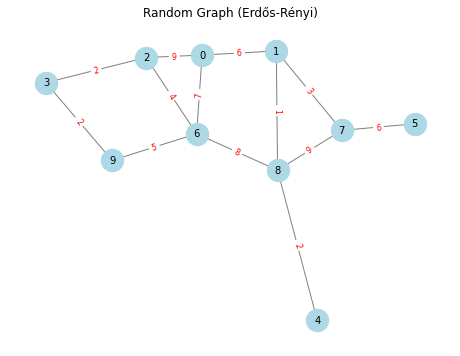

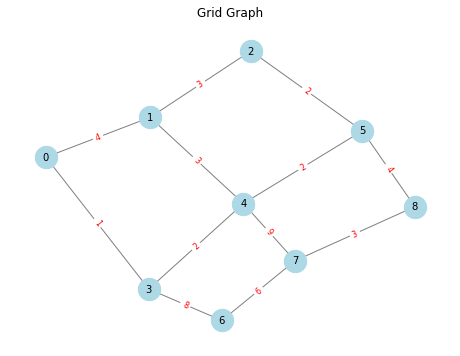

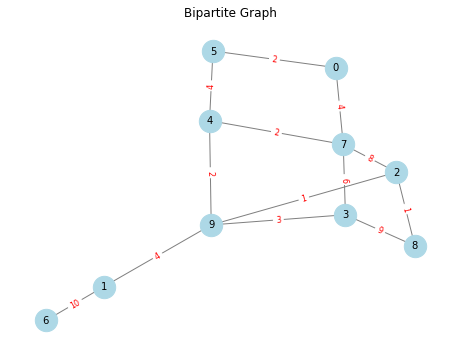

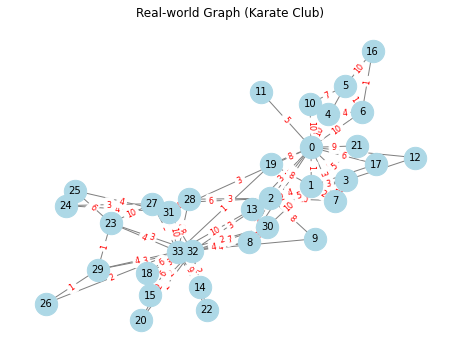

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph, title="Graph Visualization"):
    """Visualize a graph with node labels and edge weights."""
    pos = nx.spring_layout(graph)  # Layout for positioning nodes
    plt.figure(figsize=(8, 6))
    plt.title(title)

    # Draw the graph
    nx.draw(graph, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=500, font_size=10)

    # Draw edge weights
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color="red", font_size=8)

    plt.show()

# Example usage with the previously generated graphs
if __name__ == "__main__":
    # Generate graphs
    random_graph = generate_random_graph(num_nodes=10, edge_prob=0.3)
    grid_graph = generate_grid_graph(dim_x=3, dim_y=3)
    bipartite_graph = generate_bipartite_graph(set1_size=5, set2_size=5, edge_prob=0.5)
    real_world_graph = generate_real_world_graph()

    # Visualize each graph
    visualize_graph(random_graph, title="Random Graph (Erdős-Rényi)")
    visualize_graph(grid_graph, title="Grid Graph")
    visualize_graph(bipartite_graph, title="Bipartite Graph")
    visualize_graph(real_world_graph, title="Real-world Graph (Karate Club)")


<h1>baseline algorithms</h1>

In [3]:
import time

# Helper function to calculate the cut value
def calculate_cut_value(graph, partition):
    """Calculate the cut value of a given partition."""
    cut_value = 0
    for u, v, data in graph.edges(data=True):
        if partition[u] != partition[v]:
            cut_value += data.get('weight', 1)
    return cut_value

# Baseline 1: Random Partitioning
def random_partitioning(graph):
    """Randomly assign vertices to two partitions and calculate the cut value."""
    partition = {node: random.choice([0, 1]) for node in graph.nodes}
    cut_value = calculate_cut_value(graph, partition)
    return partition, cut_value

# Baseline 2: Simple Greedy Algorithm
def greedy_partitioning(graph):
    """Start with a random partition and iteratively improve it."""
    partition = {node: random.choice([0, 1]) for node in graph.nodes}
    improved = True

    while improved:
        improved = False
        for node in graph.nodes:
            current_cut_value = calculate_cut_value(graph, partition)
            partition[node] = 1 - partition[node]  # Flip the node's partition
            new_cut_value = calculate_cut_value(graph, partition)
            if new_cut_value > current_cut_value:
                improved = True  # Keep the change if it improves the cut
            else:
                partition[node] = 1 - partition[node]  # Undo the change

    cut_value = calculate_cut_value(graph, partition)
    return partition, cut_value

# # Comparative Experiments
# if __name__ == "__main__":
#     # Generate a sample graph for testing
#     test_graph = generate_random_graph(num_nodes=20, edge_prob=0.4)

#     # Baseline 1: Random Partitioning
#     start_time = time.time()
#     random_partition, random_cut_value = random_partitioning(test_graph)
#     random_runtime = time.time() - start_time

#     # Baseline 2: Greedy Algorithm
#     start_time = time.time()
#     greedy_partition, greedy_cut_value = greedy_partitioning(test_graph)
#     greedy_runtime = time.time() - start_time

#     # Output the results
#     print("Comparative Results:")
#     print("Random Partitioning:")
#     print(f"  Cut Value: {random_cut_value}")
#     print(f"  Runtime: {random_runtime:.6f} seconds\n")

#     print("Greedy Algorithm:")
#     print(f"  Cut Value: {greedy_cut_value}")
#     print(f"  Runtime: {greedy_runtime:.6f} seconds\n")

    # Note: Later compare these with the GRASP + PR results


<h1>Testing on baseline Algorithms</h1>

In [4]:
# Comparative Experiments
if __name__ == "__main__":
    # Generate graphs
    random_graph = generate_random_graph(num_nodes=150, edge_prob=0.4)
    grid_graph = generate_grid_graph(dim_x=15, dim_y=15)  # A 4x4 grid graph
    bipartite_graph = generate_bipartite_graph(set1_size=50, set2_size=50, edge_prob=0.5)
    real_world_graph = generate_real_world_graph()

    # Store graphs for testing
    test_graphs = {
        "Random Graph": random_graph,
        "Grid Graph": grid_graph,
        "Bipartite Graph": bipartite_graph,
        "Real-world Graph": real_world_graph,
    }

    # Run experiments and collect results
    for graph_name, graph in test_graphs.items():
        print(f"Testing on {graph_name}...")

        # Baseline 1: Random Partitioning
        start_time = time.time()
        random_partition, random_cut_value = random_partitioning(graph)
        random_runtime = time.time() - start_time
        print("Random Partitioning:")
        print(f"  Cut Value: {random_cut_value}")
        print(f"  Runtime: {random_runtime:.6f} seconds\n")

        # Baseline 2: Greedy Algorithm
        start_time = time.time()
        greedy_partition, greedy_cut_value = greedy_partitioning(graph)
        greedy_runtime = time.time() - start_time
        print("Greedy Algorithm:")
        print(f"  Cut Value: {greedy_cut_value}")
        print(f"  Runtime: {greedy_runtime:.6f} seconds\n")

        print("="*50)


Testing on Random Graph...
Random Partitioning:
  Cut Value: 12262
  Runtime: 0.003435 seconds

Greedy Algorithm:
  Cut Value: 14274
  Runtime: 3.727719 seconds

Testing on Grid Graph...
Random Partitioning:
  Cut Value: 1129
  Runtime: 0.000595 seconds

Greedy Algorithm:
  Cut Value: 2125
  Runtime: 0.914502 seconds

Testing on Bipartite Graph...
Random Partitioning:
  Cut Value: 3402
  Runtime: 0.000646 seconds

Greedy Algorithm:
  Cut Value: 6699
  Runtime: 0.365686 seconds

Testing on Real-world Graph...
Random Partitioning:
  Cut Value: 181
  Runtime: 0.000136 seconds

Greedy Algorithm:
  Cut Value: 309
  Runtime: 0.007385 seconds



<h1>GRASP with PATH RELINKING(OUR 1st ALGORITHM)</h1>

In [5]:
import random
import numpy as np
import networkx as nx

# Helper function to calculate the cut value
def calculate_cut_value(graph, partition):
    cut_value = 0
    for u, v, data in graph.edges(data=True):
        if partition[u] != partition[v]:
            cut_value += data.get('weight', 1)
    return cut_value

# Construction phase of GRASP
def construct_initial_solution(graph):
    partition = {node: random.choice([0, 1]) for node in graph.nodes}
    return partition

# Local search phase of GRASP
def local_search(graph, partition):
    improved = True
    while improved:
        improved = False
        for node in graph.nodes:
            current_cut_value = calculate_cut_value(graph, partition)
            partition[node] = 1 - partition[node]  # Flip node's partition
            new_cut_value = calculate_cut_value(graph, partition)
            if new_cut_value > current_cut_value:
                improved = True
            else:
                partition[node] = 1 - partition[node]  # Undo flip if no improvement
    return partition

# Path relinking phase
def path_relinking(graph, solution_a, solution_b):
    best_solution = solution_a.copy()
    best_cut_value = calculate_cut_value(graph, best_solution)

    current_solution = solution_a.copy()
    for node in solution_a:
        if solution_a[node] != solution_b[node]:
            current_solution[node] = solution_b[node]
            current_cut_value = calculate_cut_value(graph, current_solution)
            if current_cut_value > best_cut_value:
                best_solution = current_solution.copy()
                best_cut_value = current_cut_value

    return best_solution

# GRASP with Path Relinking
def grasp_pr(graph, max_iterations, elite_set_size):
    elite_set = []
    best_solution = None
    best_cut_value = -float('inf')

    for iteration in range(max_iterations):
        # GRASP Phase
        initial_solution = construct_initial_solution(graph)
        refined_solution = local_search(graph, initial_solution)

        # Update elite set
        refined_cut_value = calculate_cut_value(graph, refined_solution)
        if len(elite_set) < elite_set_size:
            elite_set.append((refined_solution, refined_cut_value))
        else:
            worst_index = min(range(len(elite_set)), key=lambda i: elite_set[i][1])
            if refined_cut_value > elite_set[worst_index][1]:
                elite_set[worst_index] = (refined_solution, refined_cut_value)

        # Path Relinking Phase
        for elite_solution, _ in elite_set:
            if refined_solution != elite_solution:
                candidate_solution = path_relinking(graph, refined_solution, elite_solution)
                candidate_cut_value = calculate_cut_value(graph, candidate_solution)

                if candidate_cut_value > best_cut_value:
                    best_solution = candidate_solution
                    best_cut_value = candidate_cut_value

    return best_solution, best_cut_value

In [6]:
# Comparative Experiments with GRASP + PR
if __name__ == "__main__":
    # Generate graphs
    random_graph = generate_random_graph(num_nodes=50, edge_prob=0.4)
    grid_graph = generate_grid_graph(dim_x=10, dim_y=10)  # A 15x15 grid graph
    bipartite_graph = generate_bipartite_graph(set1_size=35, set2_size=35, edge_prob=0.5)
    real_world_graph = generate_real_world_graph()

    # Store graphs for testing
    test_graphs = {
        "Random Graph": random_graph,
        "Grid Graph": grid_graph,
        "Bipartite Graph": bipartite_graph,
        "Real-world Graph": real_world_graph,
    }

    # Parameters for GRASP + PR
    max_iterations = 50
    elite_set_size = 5

    # Run experiments and collect results
    for graph_name, graph in test_graphs.items():
        print(f"Testing on {graph_name}...")

        # Baseline 1: Random Partitioning
        start_time = time.time()
        random_partition, random_cut_value = random_partitioning(graph)
        random_runtime = time.time() - start_time
        print("Random Partitioning:")
        print(f"  Cut Value: {random_cut_value}")
        print(f"  Runtime: {random_runtime:.6f} seconds\n")

        # Baseline 2: Greedy Algorithm
        start_time = time.time()
        greedy_partition, greedy_cut_value = greedy_partitioning(graph)
        greedy_runtime = time.time() - start_time
        print("Greedy Algorithm:")
        print(f"  Cut Value: {greedy_cut_value}")
        print(f"  Runtime: {greedy_runtime:.6f} seconds\n")

        # GRASP + PR
        start_time = time.time()
        grasp_solution, grasp_cut_value = grasp_pr(graph, max_iterations, elite_set_size)
        grasp_runtime = time.time() - start_time
        print("GRASP + PR:")
        print(f"  Cut Value: {grasp_cut_value}")
        print(f"  Runtime: {grasp_runtime:.6f} seconds\n")

        print("="*50)

Testing on Random Graph...
Random Partitioning:
  Cut Value: 1395
  Runtime: 0.000259 seconds

Greedy Algorithm:
  Cut Value: 1785
  Runtime: 0.169929 seconds

GRASP + PR:
  Cut Value: 1810
  Runtime: 3.787558 seconds

Testing on Grid Graph...
Random Partitioning:
  Cut Value: 498
  Runtime: 0.000227 seconds

Greedy Algorithm:
  Cut Value: 904
  Runtime: 0.035680 seconds

GRASP + PR:
  Cut Value: 1004
  Runtime: 2.970405 seconds

Testing on Bipartite Graph...
Random Partitioning:
  Cut Value: 1636
  Runtime: 0.000374 seconds

Greedy Algorithm:
  Cut Value: 3205
  Runtime: 0.093271 seconds

GRASP + PR:
  Cut Value: 3205
  Runtime: 4.349906 seconds

Testing on Real-world Graph...
Random Partitioning:
  Cut Value: 231
  Runtime: 0.000077 seconds

Greedy Algorithm:
  Cut Value: 262
  Runtime: 0.004025 seconds

GRASP + PR:
  Cut Value: 332
  Runtime: 0.289892 seconds

